In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# GOAL:  we are trying to find which features in the data have the highest impact on customer spend.

In [3]:
df = pd.read_csv("../data.csv", index_col=0)
df = pd.read_csv("../AN_EW_CUST_DATASET_202303141449.csv", index_col=0)

In [3]:
df.head()

,AGE_,INCOME,ETHNIC_CODE_GROUP,AN_BIRTHDAY,POSTAL_CD,LOYALTY_YN,LOYALTY_ENROLLMENT_DT,FIRST_ANTHRO_ORDER,LIFETIME_APPAREL_DEMAND,LIFETIME_APPAREL_ORDERS,...,STORE_NAME,STORE_ZIP,DIVISION_NAME,DEPARTMENT_NAME,CLASS_NAME,PRODUCT_ID,ITEM_NAME,MD_STATE,DEMAND_QTY,DEMAND_AMT
IID,,,,,,,,,,,,,,,,,,,,,
010TUGIXZ95K5R,57,8,K,0.0,85260.0,Y,00:00.0,3/24/2015,5059.97,67,...,"423 SCOTTSDALE,AZ-KIERLND (NA)",85254-2176,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S BOTTOMS (NA),PANTS (NA),54766134,ASYMMETRICAL PULL ON PANT,REG PRICE,1,52.46
0109BPMLXNREXT,50,7,J,306.0,20017.0,Y,00:00.0,10/15/2015,17353.28,54,...,ANT DIRECT SELLING (NA),NaN,OFF HOURS (NA),ANTHRO - OFF HOURS (NA),LOUNGE (NA),59001933,COZY KNIT JOGGER,REG PRICE,1,44.96
0102I4L0PINZB3,54,11,E,1129.0,23233.0,Y,00:00.0,7/11/2017,4481.17,30,...,"444 RICHMOND, VA (NA)",23235-1955,ANTHRO. WOMEN'S DIVISION (NA),JACKETS (NA),OUTERWEAR - ANTHRO. (NA),69997476,UNREAL FUR KATHMANDU COAT,REG PRICE,1,179.97
010QS307CAT5WJ,48,11,K,204.0,23453.0,Y,00:00.0,6/28/2018,8312.67,47,...,ANT DIRECT SELLING (NA),NaN,APPAREL EXTENDED SIZES (NA),PETITES (NA),JEANS - PETITES (NA),58280181,OB HR FEMME DARTED SKINNY,MARKDOWN,1,128.00
0101EN5Q3W4AE8,32,9,K,0.0,94108.0,Y,00:00.0,7/12/2019,6528.04,37,...,ANT DIRECT SELLING (NA),NaN,APPAREL EXTENDED SIZES (NA),PETITES (NA),DRESSES - PETITES (NA),66952177,OB 1 SHLDR CHERRY PRNTD M,MARKDOWN,1,160.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284141 entries, 010TUGIXZ95K5R to 0108VVYR1GJ2F0
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AGE_                      284141 non-null  int64  
 1   INCOME                    284141 non-null  int64  
 2   ETHNIC_CODE_GROUP         284141 non-null  object 
 3   AN_BIRTHDAY               243602 non-null  float64
 4   POSTAL_CD                 284046 non-null  float64
 5   LOYALTY_YN                284141 non-null  object 
 6   LOYALTY_ENROLLMENT_DT     257998 non-null  object 
 7   FIRST_ANTHRO_ORDER        284141 non-null  object 
 8   LIFETIME_APPAREL_DEMAND   284141 non-null  float64
 9   LIFETIME_APPAREL_ORDERS   284141 non-null  int64  
 10  ORDER_DT                  284141 non-null  object 
 11  ORDER_ID                  284141 non-null  object 
 12  ORDER_LINE_SEQ            284141 non-null  int64  
 13  PURCHASE_CHANNEL_DERIVED  28

In [5]:
mycolumn = df["ETHNIC_CODE_GROUP"].value_counts()
mycolumn

K    180366
E     35617
L     12572
A     12202
B     11398
Z      8861
C      7346
G      6634
J      6111
I      2062
D       733
F       198
M        37
H         4
Name: ETHNIC_CODE_GROUP, dtype: int64

<AxesSubplot: >

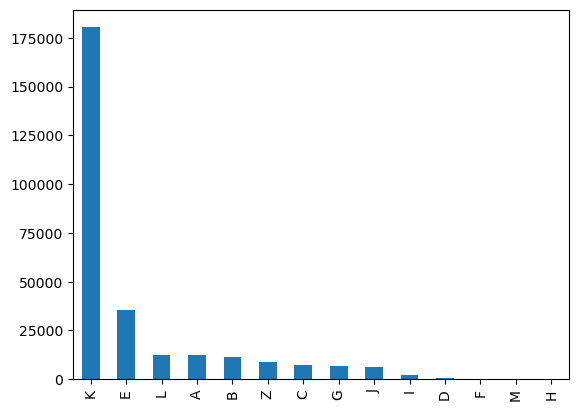

In [6]:
mycolumn.plot(kind="bar")

<AxesSubplot: ylabel='ETHNIC_CODE_GROUP'>

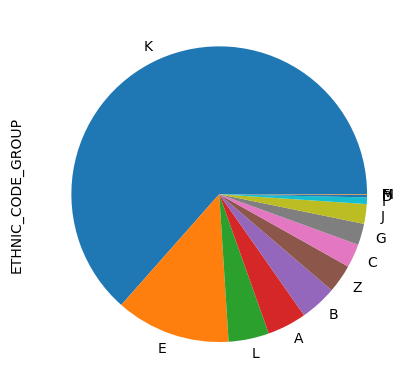

In [7]:
mycolumn.plot(kind="pie")

	VALUE	DESCRIPTION
	A	All African American
	B	Asian American 1
	C	Asian American 2
	D	Asian American 3
	E	Mediterranean
	F	Native American
	G	Scandinavian
	H	Polynesian
	I	Middle Eastern
	J	Jewish
	K	Western European
	L	Eastern European
	M	Miscellaneous - Other

In [10]:
df=df.reset_index()

In [11]:
# Filtering customers who visited more than once.

customer_frequency=df['IID'].value_counts()

customer_at_least_twice=customer_frequency[customer_frequency>1].index
customer_at_least_twice=list(customer_at_least_twice)
customer_at_least_twice

['010NNJ93E7VKUN',
 '0103IPXSGJD0X6',
 '010EAXG020328O',
 '010TPQOHLPTWWR',
 '0100TTZOKEZYCA',
 '010EF2O2JTXADL',
 '0108VVYR1GJ2F0',
 '010P0OLCI368WG',
 '010PXG5QVFDRTI',
 '010FWUXWDS10FC',
 '010P86L54YFI9B',
 '010C85LN8P8FNP',
 '010DO5W59TBX2I',
 '0113X2MODWB019',
 '010N7VG2IOXYEX',
 '010BJII4D0YBIX',
 '0115G7QWH7FY3N',
 '010AB0HK4R9RJA',
 '010AP6JC87A58U',
 '0100INEXMG9VLF',
 '010J9A8LGPOB87',
 '010SYAX2VA9SPQ',
 '010JP1HZS2KF16',
 '010MT2QDFMQJK1',
 '010H31WPJFS5GE',
 '010K4BIMGCTW7O',
 '0106SUXZQ8RMGM',
 '010OCEMWOKWCAV',
 '010YGG49KGXDGY',
 '010XOV3UC5J7N5',
 '010UUSEM265VTO',
 '010EEWJS9C15PO',
 '010C3G3CL8GC75',
 '0108TIAO0OQ91C',
 '01007WSI1HMG77',
 '010IH5HBN7JC78',
 '0109BPHS7VZOD5',
 '010CZ4TD813NJB',
 '010VQNZYNXVJMH',
 '0100Z50HZVRUEK',
 '010IFYT588IK1C',
 '0109XOG1J6IF53',
 '010CL32M9FOXMY',
 '0100GANDQZ0FCW',
 '010G1HO6T8CCZF',
 '010BKATQ0WE51U',
 '010TFBF6XSIRLL',
 '0115GW9C8RBQXP',
 '010JLDPL0NQZ4S',
 '010K2NSTO58YMC',
 '0100N3BPPV0AJG',
 '010YYN4M66CPPW',
 '01053ASY3E

In [12]:
df.columns


Index(['IID', 'AGE_', 'INCOME', 'ETHNIC_CODE_GROUP', 'AN_BIRTHDAY',
       'POSTAL_CD', 'LOYALTY_YN', 'LOYALTY_ENROLLMENT_DT',
       'FIRST_ANTHRO_ORDER', 'LIFETIME_APPAREL_DEMAND',
       'LIFETIME_APPAREL_ORDERS', 'ORDER_DT', 'ORDER_ID', 'ORDER_LINE_SEQ',
       'PURCHASE_CHANNEL_DERIVED', 'STORE_NUM', 'STORE_NAME', 'STORE_ZIP',
       'DIVISION_NAME', 'DEPARTMENT_NAME', 'CLASS_NAME', 'PRODUCT_ID',
       'ITEM_NAME', 'MD_STATE', 'DEMAND_QTY', 'DEMAND_AMT'],
      dtype='object')

In [13]:
customer_frequency[customer_frequency>1]

010NNJ93E7VKUN    8804
0103IPXSGJD0X6    1790
010EAXG020328O    1560
010TPQOHLPTWWR    1227
0100TTZOKEZYCA    1150
                  ... 
010XOE8XAOWP65       2
0100Y351VZCD0E       2
010N0P7SO8OR0K       2
010U9O9IUZI6GM       2
0112D0HNX4CJRJ       2
Name: IID, Length: 12589, dtype: int64

In [14]:
df.dtypes

IID                          object
AGE_                          int64
INCOME                        int64
ETHNIC_CODE_GROUP            object
AN_BIRTHDAY                 float64
POSTAL_CD                   float64
LOYALTY_YN                   object
LOYALTY_ENROLLMENT_DT        object
FIRST_ANTHRO_ORDER           object
LIFETIME_APPAREL_DEMAND     float64
LIFETIME_APPAREL_ORDERS       int64
ORDER_DT                     object
ORDER_ID                     object
ORDER_LINE_SEQ                int64
PURCHASE_CHANNEL_DERIVED     object
STORE_NUM                     int64
STORE_NAME                   object
STORE_ZIP                    object
DIVISION_NAME                object
DEPARTMENT_NAME              object
CLASS_NAME                   object
PRODUCT_ID                    int64
ITEM_NAME                    object
MD_STATE                     object
DEMAND_QTY                    int64
DEMAND_AMT                  float64
dtype: object

In [15]:
#Filtering customers who at least spent twice

df_twice=df.loc[df["IID"].isin(customer_at_least_twice)] [['IID', 'ETHNIC_CODE_GROUP', 'LIFETIME_APPAREL_DEMAND', 'POSTAL_CD']]
df_twice=df_twice.drop_duplicates(keep='first')
df_twice.shape

(12589, 4)

In [16]:
df_twice_agg=df_twice.groupby('ETHNIC_CODE_GROUP').median()['LIFETIME_APPAREL_DEMAND']

C:\Users\Owner\AppData\Local\Temp\ipykernel_11196\819409351.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_twice_agg=df_twice.groupby('ETHNIC_CODE_GROUP').median()['LIFETIME_APPAREL_DEMAND']


In [17]:
# AVERAGE SPEND PER ETHNIC GROUP
df_twice_agg.sort_values()

ETHNIC_CODE_GROUP
H     130.850
I    1041.900
E    1111.960
A    1178.815
G    1302.950
B    1328.450
F    1358.340
Z    1377.800
K    1379.400
L    1420.535
J    1465.950
C    1476.270
D    1761.005
M    1988.030
Name: LIFETIME_APPAREL_DEMAND, dtype: float64

<AxesSubplot: xlabel='ETHNIC_CODE_GROUP'>

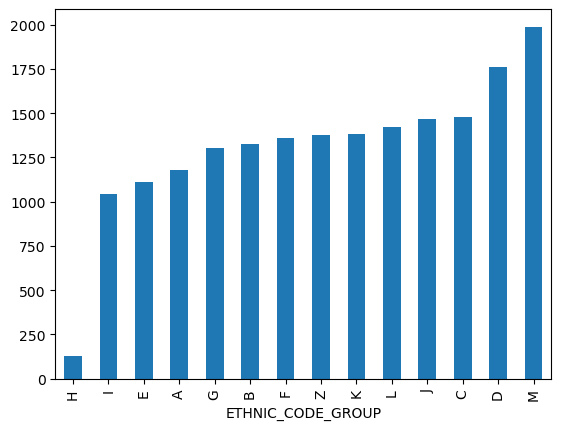

In [18]:
#Lifetime apparel demand
df_twice_agg.sort_values().plot(kind='bar')

In [19]:
#Looking at rel. btwn ethnic code and overall purchases which is money spent.
df.groupby('ETHNIC_CODE_GROUP')['DEMAND_AMT'].median()



ETHNIC_CODE_GROUP
A    58.000
B    48.000
C    58.500
D    59.500
E    59.970
F    58.000
G    67.460
H    53.975
I    53.970
J    67.460
K    59.970
L    57.800
M    20.400
Z    50.960
Name: DEMAND_AMT, dtype: float64

In [20]:
df_twice.groupby('POSTAL_CD')['ETHNIC_CODE_GROUP'].unique()

POSTAL_CD
1002.0        [K]
1030.0        [Z]
1033.0        [K]
1038.0        [K]
1040.0        [K]
            ...  
99517.0       [G]
99523.0       [L]
99645.0       [L]
99801.0       [K]
99835.0    [G, K]
Name: ETHNIC_CODE_GROUP, Length: 5336, dtype: object

In [21]:
df_twice.groupby('POSTAL_CD')['ETHNIC_CODE_GROUP'].count()


POSTAL_CD
1002.0     3
1030.0     1
1033.0     1
1038.0     1
1040.0     1
          ..
99517.0    1
99523.0    1
99645.0    1
99801.0    1
99835.0    2
Name: ETHNIC_CODE_GROUP, Length: 5336, dtype: int64

In [22]:
#show more rows pd.set_option('display.max_rows', 500)

In [23]:
df_twice.groupby(['ETHNIC_CODE_GROUP', 'POSTAL_CD']).value_counts().sort_values()

ETHNIC_CODE_GROUP  POSTAL_CD  IID             LIFETIME_APPAREL_DEMAND
A                  1760.0     010UCJSVDW5HA3  2046.97                    1
K                  60137.0    0109BBXTJH7HCY  17809.23                   1
                              010CJDRZ5JTNZN  2893.19                    1
                              010IA33V9M339   3292.97                    1
                   60142.0    010KBW142PJQVK  276.00                     1
                                                                        ..
                   2864.0     010YZCFNSPFV67  376.19                     1
                   2871.0     010N3H5BN5EZWM  498.00                     1
                   2878.0     0107MOZ86NLVK2  682.89                     1
                   2891.0     010620GE3AU8W3  49.97                      1
Z                  99203.0    010EW3T2U4H9ZP  1252.66                    1
Length: 12584, dtype: int64

In [24]:
df_twice

,IID,ETHNIC_CODE_GROUP,LIFETIME_APPAREL_DEMAND,POSTAL_CD
0,010TUGIXZ95K5R,K,5059.97,85260.0
1,0109BPMLXNREXT,J,17353.28,20017.0
2,0102I4L0PINZB3,E,4481.17,23233.0
3,010QS307CAT5WJ,K,8312.67,23453.0
4,0101EN5Q3W4AE8,K,6528.04,94108.0
...,...,...,...,...
275839,0101X0UOJ3ZULX,K,208.00,77036.0
278058,0102INOBUDLRRX,K,328.00,80108.0
279735,010YYU7VHBPL2S,E,663.86,64133.0
282626,010O6Q1OT7N28Q,B,49.94,75024.0


In [25]:
df.columns

Index(['IID', 'AGE_', 'INCOME', 'ETHNIC_CODE_GROUP', 'AN_BIRTHDAY',
       'POSTAL_CD', 'LOYALTY_YN', 'LOYALTY_ENROLLMENT_DT',
       'FIRST_ANTHRO_ORDER', 'LIFETIME_APPAREL_DEMAND',
       'LIFETIME_APPAREL_ORDERS', 'ORDER_DT', 'ORDER_ID', 'ORDER_LINE_SEQ',
       'PURCHASE_CHANNEL_DERIVED', 'STORE_NUM', 'STORE_NAME', 'STORE_ZIP',
       'DIVISION_NAME', 'DEPARTMENT_NAME', 'CLASS_NAME', 'PRODUCT_ID',
       'ITEM_NAME', 'MD_STATE', 'DEMAND_QTY', 'DEMAND_AMT'],
      dtype='object')

In [26]:
df=df.drop(['AN_BIRTHDAY', 'FIRST_ANTHRO_ORDER', 'POSTAL_CD', 'ORDER_DT', 'ORDER_ID', 'ORDER_LINE_SEQ', 'PURCHASE_CHANNEL_DERIVED',  'DEPARTMENT_NAME', 'CLASS_NAME', 'IID', 'DEMAND_QTY', 'DEMAND_AMT', 'LOYALTY_YN'], axis=1).copy()

In [27]:
df.head()

,AGE_,INCOME,ETHNIC_CODE_GROUP,LOYALTY_ENROLLMENT_DT,LIFETIME_APPAREL_DEMAND,LIFETIME_APPAREL_ORDERS,STORE_NUM,STORE_NAME,STORE_ZIP,DIVISION_NAME,PRODUCT_ID,ITEM_NAME,MD_STATE
0,57,8,K,00:00.0,5059.97,67,423,"423 SCOTTSDALE,AZ-KIERLND (NA)",85254-2176,ANTHRO. WOMEN'S DIVISION (NA),54766134,ASYMMETRICAL PULL ON PANT,REG PRICE
1,50,7,J,00:00.0,17353.28,54,2499,ANT DIRECT SELLING (NA),NaN,OFF HOURS (NA),59001933,COZY KNIT JOGGER,REG PRICE
2,54,11,E,00:00.0,4481.17,30,444,"444 RICHMOND, VA (NA)",23235-1955,ANTHRO. WOMEN'S DIVISION (NA),69997476,UNREAL FUR KATHMANDU COAT,REG PRICE
3,48,11,K,00:00.0,8312.67,47,2499,ANT DIRECT SELLING (NA),NaN,APPAREL EXTENDED SIZES (NA),58280181,OB HR FEMME DARTED SKINNY,MARKDOWN
4,32,9,K,00:00.0,6528.04,37,2499,ANT DIRECT SELLING (NA),NaN,APPAREL EXTENDED SIZES (NA),66952177,OB 1 SHLDR CHERRY PRNTD M,MARKDOWN


In [28]:
df.to_csv("../data.csv")

In [29]:
#Show ave age of each Ethnic Group. (Each ethnic group is about the same age )

aveage=df.groupby(['ETHNIC_CODE_GROUP']).mean()['AGE_']

C:\Users\Owner\AppData\Local\Temp\ipykernel_11196\2625499132.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aveage=df.groupby(['ETHNIC_CODE_GROUP']).mean()['AGE_']


<AxesSubplot: xlabel='ETHNIC_CODE_GROUP'>

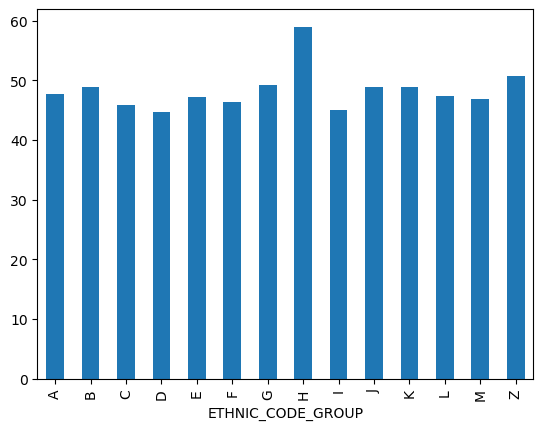

In [30]:
aveage.plot(kind='bar')

C:\Users\Owner\AppData\Local\Temp\ipykernel_11196\3561736646.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sumdemand=df.groupby(['ETHNIC_CODE_GROUP']).sum()['LIFETIME_APPAREL_DEMAND']


<AxesSubplot: xlabel='ETHNIC_CODE_GROUP'>

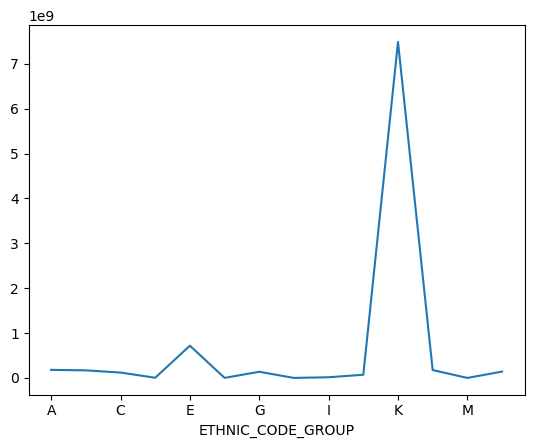

In [31]:
sumdemand=df.groupby(['ETHNIC_CODE_GROUP']).sum()['LIFETIME_APPAREL_DEMAND']
sumdemand.plot(kind='line')

C:\Users\Owner\AppData\Local\Temp\ipykernel_11196\1152234187.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sumdemand=df.groupby(['ETHNIC_CODE_GROUP']).mean()['LIFETIME_APPAREL_DEMAND']


<AxesSubplot: xlabel='ETHNIC_CODE_GROUP'>

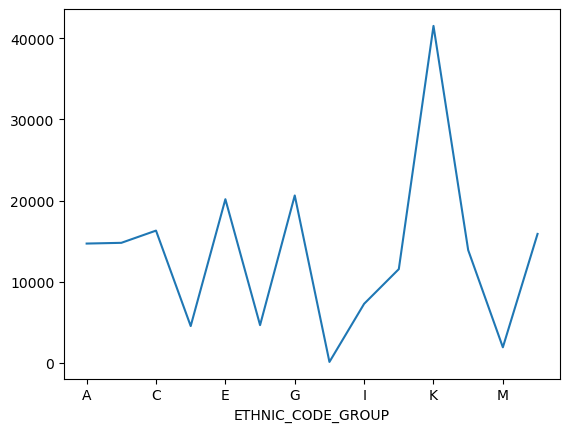

In [32]:
sumdemand=df.groupby(['ETHNIC_CODE_GROUP']).mean()['LIFETIME_APPAREL_DEMAND']
sumdemand.plot(kind='line')

C:\Users\Owner\AppData\Local\Temp\ipykernel_11196\974261100.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sumdemand=df.groupby(['ETHNIC_CODE_GROUP']).median()['LIFETIME_APPAREL_DEMAND']


<AxesSubplot: xlabel='ETHNIC_CODE_GROUP'>

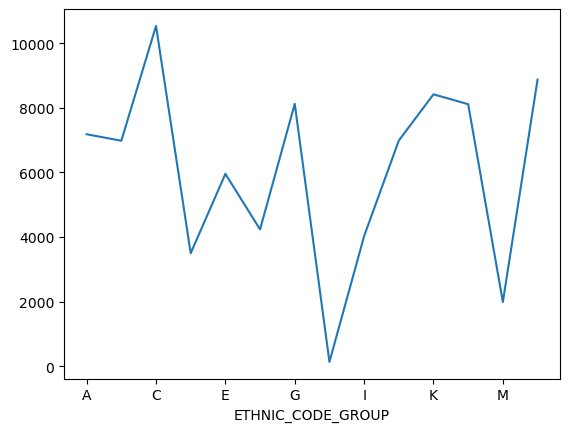

In [33]:
sumdemand=df.groupby(['ETHNIC_CODE_GROUP']).median()['LIFETIME_APPAREL_DEMAND']
sumdemand.plot(kind='line')

C:\Users\Owner\AppData\Local\Temp\ipykernel_11196\2235735056.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sumdemand=df.groupby(['ETHNIC_CODE_GROUP']).median()['LIFETIME_APPAREL_DEMAND']


<AxesSubplot: ylabel='LIFETIME_APPAREL_DEMAND'>

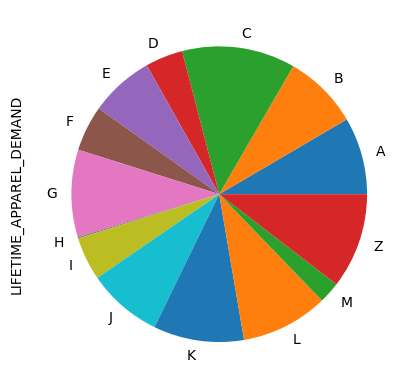

In [34]:
sumdemand=df.groupby(['ETHNIC_CODE_GROUP']).median()['LIFETIME_APPAREL_DEMAND']
sumdemand.plot(kind='pie')